## setup env

In [2]:
#import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image
import pandas as pd
import glob

In [6]:
os.chdir('./MaskTheFace')

## creating the dataset of masked image

In [ ]:
!python3 mask_the_face.py --path '../data/img_align_celeba/' --mask_type 'surgical' 

 __  __           _ _______ _          ______
|  \/  |         | |__   __| |        |  ____|
| \  / | __ _ ___| | _| |  | |__   ___| |__ __ _  ___ ___
| |\/| |/ _` / __| |/ / |  | '_ \ / _ \  __/ _` |/ __/ _ \
| |  | | (_| \__ \   <| |  | | | |  __/ | | (_| | (_|  __/
|_|  |_|\__,_|___/_|\_\_|  |_| |_|\___|_|  \__,_|\___\___|
-------------------------------------------------------------
-------------------- Masking image files --------------------
-------------------------------------------------------------
 72%|██████████████████████▏        | 144914/202599 [3:25:43<1:23:17, 11.54it/s]/home/marsu/Documents/epita/inria/mask_segmentation/MaskTheFace/utils/aux_functions.py:131: RankWarning: Polyfit may be poorly conditioned
  perp_line = fit_line(x, y, image)
 94%|███████████████████████████████▏ | 191282/202599 [4:33:38<15:45, 11.97it/s]/home/marsu/Documents/epita/inria/mask_segmentation/MaskTheFace/utils/aux_functions.py:131: RankWarning: Polyfit may be poorly conditioned
  perp_line 

## Visualisation

In [3]:
def fast_display(*img2dlist):
    plt.figure(figsize=(16,8))
    nbimg = len(img2dlist)
    cols = min (9,nbimg)
    rows = (nbimg // cols) +1
    for ii, img2d in enumerate(img2dlist):
        plt.subplot(rows,cols,1+ii)
        plt.imshow(img2d)
    plt.show()

(218, 178)
(218, 178)
(218, 178)


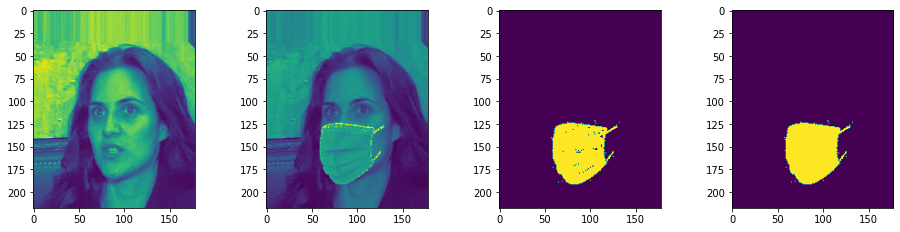

In [4]:
from matplotlib import image
from matplotlib import pyplot as plt 
import numpy as np
from skimage import color
from skimage import io
from skimage.util import compare_images
from scipy.ndimage.morphology import binary_fill_holes
#img =(io.imread('image.png'))
  
image_withoutmask =  color.rgb2gray(image.imread('/home/marsu/Documents/epita/inria/mask_segmentation/data/img_align_celeba/033767.jpg'))
image_masked =  color.rgb2gray(image.imread('/home/marsu/Documents/epita/inria/mask_segmentation/data/_masked/033767_surgical.jpg'))
diff_rotated = compare_images(image_withoutmask, image_masked, method='diff')
diff_rotated[diff_rotated < 0.02] = 0

b = binary_fill_holes(diff_rotated)
diff_rotated[diff_rotated != 0] = 1

print(image_withoutmask.shape)
print(image_masked.shape)
a = image_masked == image_withoutmask
print(a.shape)
fast_display(image_withoutmask,image_masked,diff_rotated,b)


## creating the mask dataset

In [10]:
def create_mask(src_dir,masked_dir,outdir,file):
    src_file = os.path.join(src_dir,file)
    masked_file = file[:-4] + '_surgical.jpg'
    masked_file = os.path.join(masked_dir,masked_file)
    image_withoutmask =  color.rgb2gray(image.imread(src_file))
    image_masked =  color.rgb2gray(image.imread(masked_file))
    diff_rotated = compare_images(image_withoutmask, image_masked, method='diff')
    diff_rotated[diff_rotated < 0.02] = 0
    b = binary_fill_holes(diff_rotated)
    im = Image.fromarray(b)
    im.save(os.path.join(outdir,file))

In [14]:
src_dir = './data/img_align_celeba'
masked_dir = './data/_masked'
outdir = './data/mask'
i = 0
for file in os.listdir(src_dir):
    try:
        create_mask(src_dir,masked_dir,outdir,file)
    except:
        pass

In [7]:
!ls

data			 MaskTheFace	     unet_tensor.ipynb
dataset_creation.ipynb	 model_cifar.pt
dataset_wih_point.ipynb  unet_pytorch.ipynb
